# Problem 4

In [46]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np #importing numpy for matrix operations
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
x = np.linspace(0,1,100)

In [3]:
y = np.cos(2*np.pi*x)

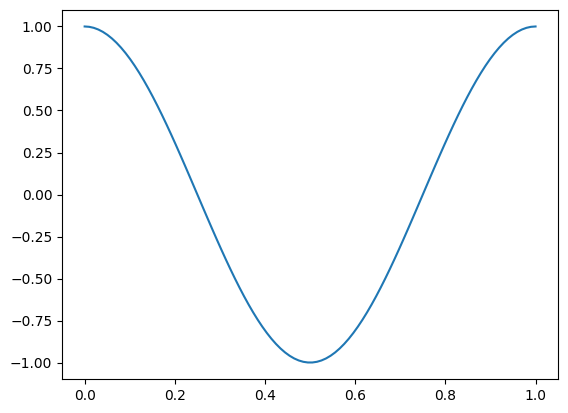

In [4]:
plt.plot(x,y)

In [5]:
z = y+np.random.normal(0,0.1,np.shape(y))

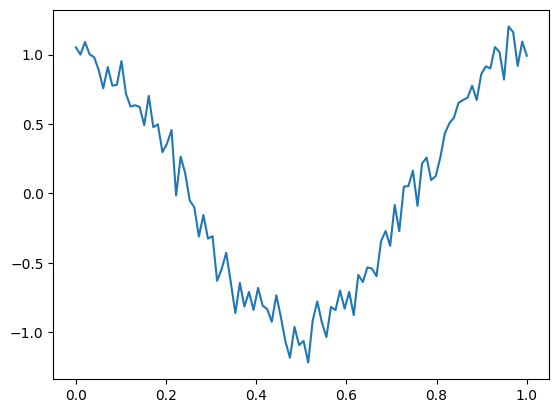

In [6]:
plt.plot(x,z)

[0.         0.39674762] -0.12953656137523895
[ 0.         -8.55772027  8.91835752] 1.3205805044577517
[ 0.         -9.16386066 10.08730182 -0.8812107 ] 1.4514207198267015
[  0.           3.19320388 -47.23853801  89.28864903 -45.55106719] 0.9435283677773706
[   0.            4.73821671  -62.65941067  140.97422337 -113.69121658
   30.89984899] 0.888089634062662
[   0.           15.97928321 -151.89041813  455.52413789 -659.39337022
  486.74791418 -146.27503101] 0.3799789670814723
[    0.            45.22739379  -409.44733655  1644.67980927
 -3713.4302389   4817.9640557  -3299.42795535   916.32764786] -0.9027850273781997
[ 0.00000000e+00 -7.60224779e+00  1.12933212e+02 -9.90133200e+02
  3.96911767e+03 -8.65136533e+03  1.06679441e+04 -6.95237817e+03
  1.85168780e+03] 1.0825872095705293
[     0.             48.6423736    -638.79467175   3349.8957388
  -8464.20075862   8112.49999462   6580.51884516 -22401.07296025
  18958.24114036  -5545.35123294] 0.02904987525458265
[ 0.00000000e+00  1.26267

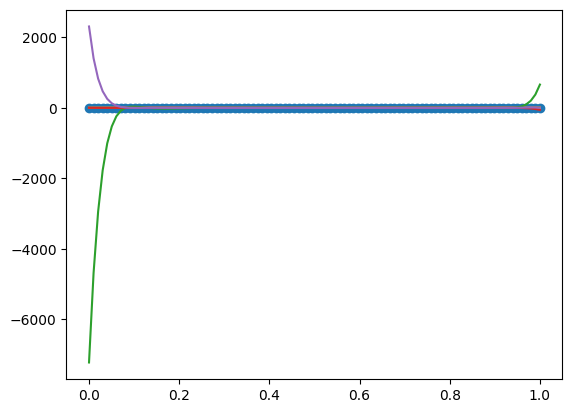

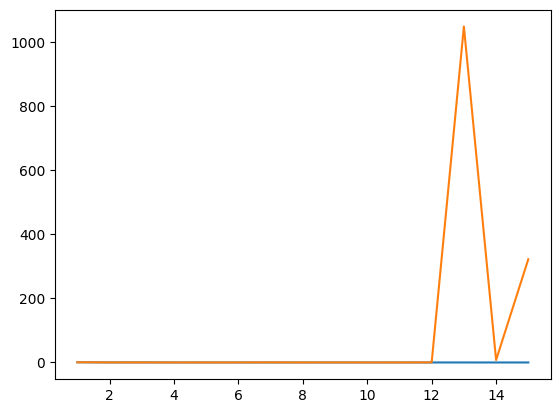

In [44]:
plt.scatter(x,z)
test_scores = []
train_scores = []
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.8,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,LinearRegression())
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)

[ 0.        -0.3514528] 0.1388776810335931
[ 0.         -8.89519423  9.14022729] 1.4167761422655816
[ 0.         -9.83298005 11.78702443 -2.11062629] 1.558465604547298
[  0.         -13.69863924  14.63758798   4.35991627  -6.16498882] 2.11087585551779
[ 0.         -9.64708369  6.10688557  6.93825474  0.5117073  -4.39449574] 1.649390111394749
[ 0.         -7.73868685  2.43119883  6.85518589  2.83368893 -0.74558515
 -3.66965289] 1.4273817753098696
[ 0.         -6.28393879 -1.87836948  8.51030624  4.85810612  0.51459567
 -2.17780067 -3.81347401] 1.3834338674882474
[ 0.         -6.77819974  0.4629343   6.10017178  3.70425587  1.07651122
 -0.56229781 -1.87782842 -2.51067898] 1.3624361183462057
[ 0.         -5.22541117 -4.03773512  7.37183127  5.44351305  1.98467417
 -0.1210693  -1.58330439 -2.05312637 -2.09653356] 1.3520116824064912
[  0.          -6.33346406   0.82380817   3.68741063   3.8913464
   3.22128971   1.75568224   0.           0.          -0.2591212
 -12.98293614] 1.2029896469305

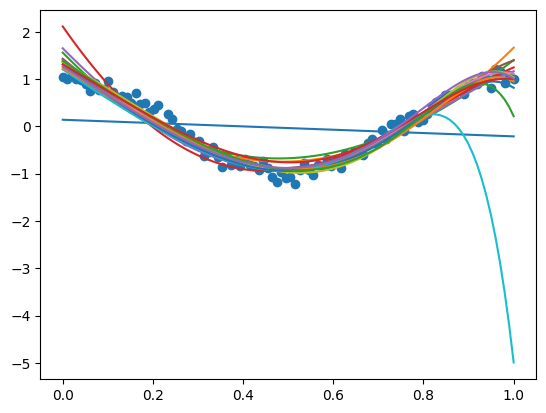

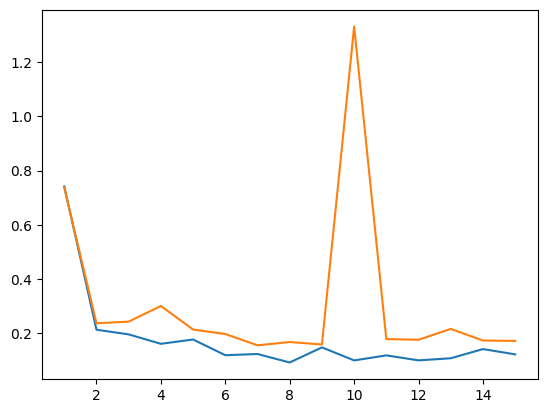

In [47]:
from sklearn.linear_model import Lasso
plt.scatter(x,z)
test_scores = []
train_scores = []
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.8,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,Lasso(alpha=1/100000))
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)

[0.        0.4153372] -0.11280767337482903
[ 0.         -9.59479907  9.7110942 ] 1.5552707154296679
[ 0.         -7.92115467  6.2107288   1.97060753] 1.3876744465119994
[  0.          -4.23640016 -10.94657305  31.41296324 -16.14121647] 1.1791755247628637
[  0.          -3.42325208 -12.8766641   20.33068516  13.29900379
 -17.55288875] 1.1789896824882247
[ 0.         -7.98033708 -0.56632376  9.37788676  6.56278006 -0.90198914
 -7.15996242] 1.7073631198701371
[  0.          -3.04507014 -11.33981371  14.8033587    9.7761634
  -2.01261762  -6.72803558  -1.64485348] 1.1467574542851282
[ 0.         -4.90983142 -7.08534566 13.53117638  8.63840063 -1.93229895
 -7.43698274 -5.2284685   4.03654187] 1.3427429649446936
[ 0.         -4.44180072 -7.06555525 10.6637815   8.64813137  0.92007137
 -4.01854872 -4.65759088 -2.19229192  1.76294559] 1.2136695419981662
[ 0.         -4.97830674 -7.17997579 13.00413576  8.81776296 -0.18735302
 -5.47148179 -6.14797777 -3.61663068  0.5535436   5.19210468] 1.35244

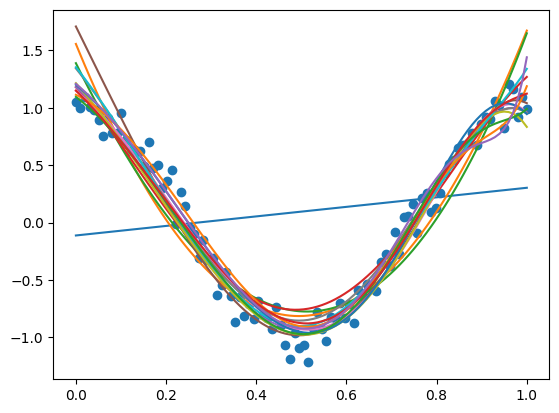

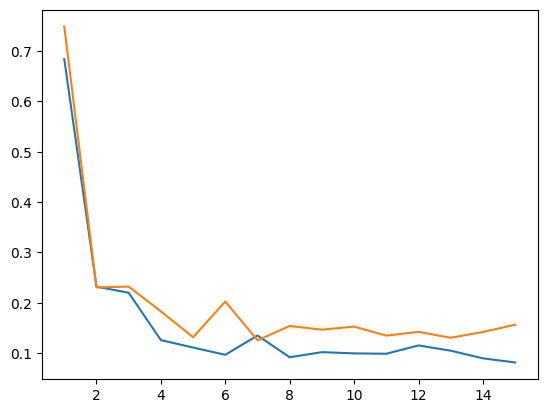

In [48]:
from sklearn.linear_model import Ridge
plt.scatter(x,z)
test_scores = []
train_scores = []
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.8,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,Ridge(alpha=1/10000))
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print(modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)

# Problem 5

In [50]:
import pandas as pd

In [92]:
daf = pd.read_csv("C:/Users/osave/Downloads/HW1_P5_weatherHistory.csv")

In [93]:
df = pd.DataFrame(daf,columns=["Temperature (C)","Apparent Temperature (C)","Humidity","Visibility (km)","Pressure (millibars)"])
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,15.8263,1015.13
1,9.355556,7.227778,0.86,15.8263,1015.63
2,9.377778,9.377778,0.89,14.9569,1015.94
3,8.288889,5.944444,0.83,15.8263,1016.41
4,8.755556,6.977778,0.83,15.8263,1016.51


In [94]:
df.corr().style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.369173,0.005454
Visibility (km),0.392847,0.381718,-0.369173,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,0.059818,1.000000


In [95]:
df = df.drop(labels = "Pressure (millibars)",axis=1)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,9.472222,7.388889,0.89,15.8263
1,9.355556,7.227778,0.86,15.8263
2,9.377778,9.377778,0.89,14.9569
3,8.288889,5.944444,0.83,15.8263
4,8.755556,6.977778,0.83,15.8263


In [96]:
df.corr().style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


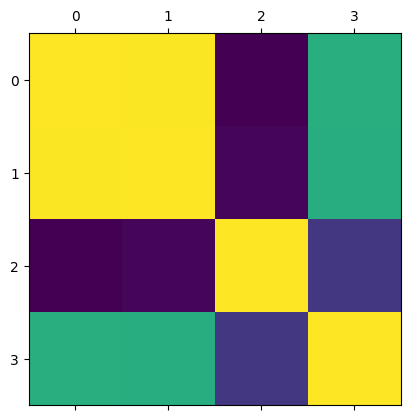